In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/sysmap.lensid.abstract_bibcouple.csv')
print(list(df.columns))
df.head()

['Item.ID', 'Short.Title', 'Title.x', 'Year', 'Period', 'Google.Scholar.link', 'Vegetated.strip.description.info', 'Nation', 'Study.country', 'Study.location', 'Latitude', 'Longitude', 'all_outcomes_subcat', 'all_outcomes_group', 'Observational', 'Manipulative', 'Study.length..years.', 'Time.since.intervention..years.', 'Plot.scale', 'Field.scale', 'Farm.scale', 'Catchment.scale', 'Regional.scale', 'Not.described', 'Q1', 'Q2', 'Q3', 'Q4', 'Not.described.2', 'Conventional', 'Organic', 'Not.described.3', 'Livestock', 'Livestock.info', 'Cropped.fields..arable.', 'Cropped.fields..arable..info', 'Horticulture', 'Horticulture.info', 'Viticulture', 'Viticulture.info', 'Fruit..orchard.', 'Fruit..orchard..info', 'Grassland', 'Grassland.info', 'Other..please.specify.', 'Other..please.specify..2', 'Not.described.4', 'Not.described.info', 'Grasses', 'Grasses.info', 'Wildflowers', 'Wildflowers.info', 'Shrubs', 'Shrubs2', 'Hedgerow', 'Hedgerow.info', 'Trees', 'Trees.info', 'Other..please.specify..3'

,Item.ID,Short.Title,Title.x,Year,Period,Google.Scholar.link,Vegetated.strip.description.info,Nation,Study.country,Study.location,...,Aesthetic,Educational,Biodiversity,Pollination2,Soil.formation,Comments,lensID,Title.y,data.abstract,distance
0,20641984,MacLeod (2004),'beetle banks' as refuges for beneficial arthr...,2004,2000-2004,http://scholar.google.co.uk/scholar?q='Beetle+...,Beetle bank,UK,UK,North Hampshire,...,NaN,NaN,Biodiversity,NaN,NaN,NaN,091-265-753-392-171,'beetle banks' as refuges for beneficial arthr...,Significant differences in the overwintering d...,0
1,20642377,Szajdak (2015),1h and 13c nmr spectroscopic studies of hexane...,2015,2015-2016,http://scholar.google.co.uk/scholar?q=1H+and+1...,Shelterbelt,Poland,Poland,Dezydery Chłapowski Agroecological Landscape P...,...,NaN,NaN,NaN,NaN,Soil formation,NaN,048-719-607-506-77X,1h and 13c nmr spectroscopic studies of hexane...,NaN,0
2,20641974,Ludy (2006),a 3-year field-scale monitoring of foliage-dwe...,2006,2005-2009,http://scholar.google.co.uk/scholar?q=A+3-year...,Field margin,Germany,Germany,"Swabia, Frankonia and Upper Bavaria",...,NaN,NaN,Biodiversity,NaN,NaN,NaN,026-135-254-635-252,a 3-year field-scale monitoring of foliage-dwe...,NaN,0
3,20641572,Collins (2003),a 5-year comparison of overwintering polyphago...,2003,2000-2004,http://scholar.google.co.uk/scholar?q=A+5-year...,"Beetle bank, conventional hedgebank",UK,UK,"Loddington Estate, Leicestershire",...,NaN,NaN,Biodiversity,NaN,NaN,NaN,003-815-496-301-575,a 5‐year comparison of overwintering polyphago...,Summary\r\nOverwintering polyphagous predator ...,1
4,20641586,Croxton (2002),a comparison of green lanes and field margins ...,2002,2000-2004,http://scholar.google.co.uk/scholar?q=A+compar...,Green lane,UK,UK,"15 green lane sites, situated within a 12 km r...",...,NaN,NaN,Biodiversity,Pollination,NaN,NaN,047-022-834-071-036,a comparison of green lanes and field margins ...,NaN,0


In [2]:
import re
def widen_column(df, column, sep='|||'):
    df = df.copy()
    columns = set([])
    for x in df[column].unique():
        for s in re.split(sep, str(x)): #.split(sep):
            s = s.strip()
            if s =="nan" or s=="None" or s=="" or s is None or "no information" in s.lower() or s=="Other":
                continue
            columns.add(s.strip())
            
    for c in columns:
        df.loc[:,c] = 0
        df.loc[df[column].str.contains(c, regex=False)==True,c] = 1
        
    return df, columns

odf, outcomes = widen_column(df[['lensID','all_outcomes_group']],'all_outcomes_group',';')
odf

,lensID,all_outcomes_group,Ecosystem functioning,Pollution,Soil chemistry,Human use,Soil physical,Biodiversity,Societal
0,091-265-753-392-171,Biodiversity;Human use,0,0,0,1,0,1,0
1,048-719-607-506-77X,Soil chemistry,0,0,1,0,0,0,0
2,026-135-254-635-252,Biodiversity,0,0,0,0,0,1,0
3,003-815-496-301-575,Biodiversity,0,0,0,0,0,1,0
4,047-022-834-071-036,Biodiversity;Ecosystem functioning,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
834,029-274-571-592-996,Soil chemistry;Soil physical,0,0,1,0,1,0,0
835,076-551-861-300-215,Soil physical,0,0,0,0,1,0,0
836,140-815-034-308-497,Human use,0,0,0,1,0,0,0
837,073-170-131-117-322,Biodiversity,0,0,0,0,0,1,0


In [3]:
k = 10
vocab = pd.read_csv(f'tm-results/features_{k}.csv', header=None)
H = pd.read_csv(f'tm-results/nmf_H_{k}.csv', header=None)
W = pd.read_csv(f'tm-results/nmf_W_{k}.csv', header=None)

H.columns = vocab.iloc[:,0]
tt = H.melt(ignore_index=False, var_name='word').rename_axis('topic').reset_index().query('value>0')
topic_names = []
for t, group in tt.groupby('topic'):
    twords = group.sort_values('value',ascending=False).head(3)
    topic_names.append('; '.join(twords['word']))
    
tdocs = pd.read_csv('data/20211019_rwbs_lens-export.csv')
missings = tdocs[pd.isna(tdocs['Abstract'])].index
print(f"Removing {missings.shape[0]} with missing Abstract")
tdocs = tdocs[~tdocs.index.isin(missings)].reset_index(drop=True)
print(tdocs.shape)

W.index = tdocs['Lens ID']
W.columns = topic_names

dt = W.melt(ignore_index=False, var_name='topic').rename_axis('doc').reset_index().query('value>0')
dt.head()

Removing 165 with missing Abstract
(822, 29)


,doc,topic,value
0,000-028-962-557-075,margin; field margin; field,0.004745
4,000-281-554-875-962,margin; field margin; field,0.040066
5,000-311-250-472-915,margin; field margin; field,0.155580
8,000-479-461-791-069,margin; field margin; field,0.015568
9,000-933-635-218-121,margin; field margin; field,0.005856


In [4]:
thresh = 0.05
m = np.zeros((len(outcomes), W.shape[1]))
for i, o in enumerate(outcomes):
    print(o)
    ids = odf[odf[o]==1]['lensID']
    odt = dt[dt['doc'].isin(ids)]
    for j, t in enumerate(topic_names):
        n = odt[(odt['topic']==t) & (odt['value']>thresh)].shape[0]
        m[i,j] = n
        
m = pd.DataFrame(m)
m.index = outcomes
m.columns = topic_names



Ecosystem functioning
Pollution
Soil chemistry
Human use
Soil physical
Biodiversity
Societal


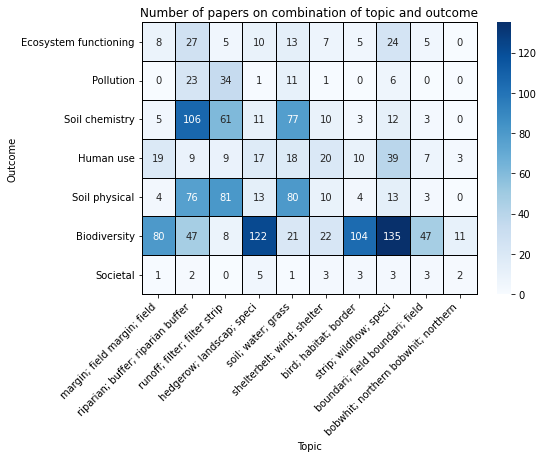

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m,
    cmap='Blues',
    annot=True,
    fmt='.3g',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Topic')

ax.set_title('Number of papers on combination of topic and outcome')

plt.savefig(f'tm-results/heatmap_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_{k}.png', dpi=150, bbox_inches="tight")

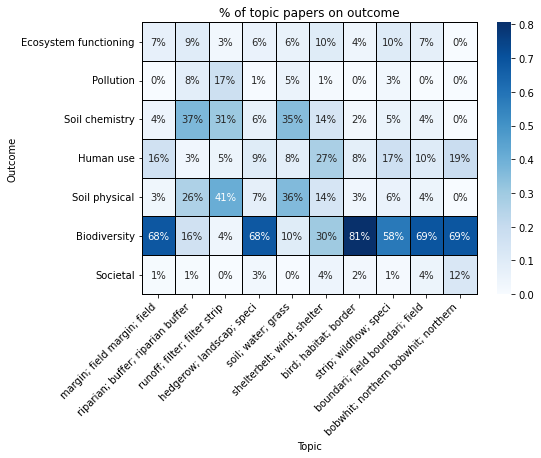

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m/m.sum(),
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Topic')

ax.set_title('% of topic papers on outcome')

plt.savefig(f'tm-results/heatmap_colsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_colsum_{k}.png', dpi=150, bbox_inches="tight")

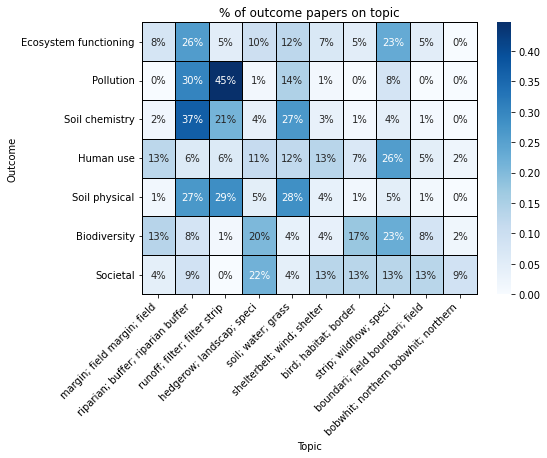

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    (m.T / m.T.sum()).T,
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Topic')

ax.set_title('% of outcome papers on topic')

plt.savefig(f'tm-results/heatmap_rowsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_rowsum_{k}.png', dpi=150, bbox_inches="tight")

In [8]:
bc = pd.read_csv('data/bc_clustered.csv')
bc.head()

,Lens ID,Title,Date Published,Publication Year,Publication Type,Source Title,ISSNs,Publisher,Source Country,Author/s,...,Source URLs,External URL,PMID,DOI,Microsoft Academic ID,PMCID,Citing Patents Count,References,Citing Works Count,cluster
0,000-028-962-557-075,Importance of hedgerows as habitat corridors f...,NaN,2009.0,journal article,Biological Conservation,00063207,Elsevier BV,Netherlands,Stephan Wehling; Martin Diekmann,...,https://pubag.nal.usda.gov/catalog/766751 http...,http://dx.doi.org/10.1016/j.biocon.2009.05.023,NaN,10.1016/j.biocon.2009.05.023,2.043999e+09,NaN,0,001-555-373-960-238; 002-874-438-870-319; 007-...,66,1.0
1,000-065-021-648-613,Avian use of Sheyenne Lake and associated habi...,1982-03-01,1982.0,journal article,Resource Publication,NaN,NaN,NaN,Craig A. Faanes,...,http://www.npwrc.usgs.gov/resource/birds/sheyl...,http://www.npwrc.usgs.gov/resource/birds/sheyl...,NaN,NaN,1.530721e+09,NaN,0,002-817-587-407-853; 016-356-453-015-079; 019-...,12,2.0
2,000-140-507-815-44X,Landscape composition models for breeding bird...,NaN,1997.0,journal article,Ecography,09067590; 16000587,Wiley,United Kingdom,R. J. Fuller; R. J. Trevelyan; R. W. Hudson,...,https://www.jstor.org/stable/3682841 https://o...,http://dx.doi.org/10.1111/j.1600-0587.1997.tb0...,NaN,10.1111/j.1600-0587.1997.tb00374.x,2.081017e+09,NaN,0,000-925-852-080-712; 002-234-862-186-238; 008-...,83,1.0
3,000-142-952-017-146,The role of riparian woods in regulating nitro...,NaN,1988.0,journal article,Regulated Rivers: Research & Management,08869375; 10991646,Wiley,United States,Gilles Pinay; Henri Décamps,...,http://pure.iiasa.ac.at/id/eprint/13625/ https...,http://dx.doi.org/10.1002/rrr.3450020404,NaN,10.1002/rrr.3450020404,1.973385e+09,NaN,0,000-789-641-528-253; 002-391-206-959-000; 002-...,213,3.0
4,000-281-554-875-962,Winter Avian Community and Sparrow Response to...,NaN,2007.0,journal article,Journal of Wildlife Management,0022541x; 19372817,Wiley,United States,Ross R. Conover; L. Wes Burger; Eric T. Linder,...,https://www.bioone.org/doi/10.2193/2006-119 ht...,http://dx.doi.org/10.2193/2006-119,NaN,10.2193/2006-119,2.152300e+09,NaN,0,000-006-765-483-604; 003-510-625-031-181; 007-...,22,2.0


In [9]:
thresh = 0.05
n_clusters = int(bc['cluster'].max())
m = np.zeros((len(outcomes), n_clusters))
for i, o in enumerate(outcomes):
    print(o)
    ids = odf[odf[o]==1]['lensID']
    obc = bc[bc['Lens ID'].isin(ids)]
    for j in range(n_clusters):
        n = obc[obc['cluster']==j+1].shape[0]
        m[i,j] = n
        
m = pd.DataFrame(m)
m.index = outcomes
m.columns = [f'Cluster {i+1}' for i in range(n_clusters)]

m

Ecosystem functioning
Pollution
Soil chemistry
Human use
Soil physical
Biodiversity
Societal


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
Ecosystem functioning,27.0,3.0,32.0,7.0,4.0,0.0,0.0
Pollution,1.0,0.0,50.0,1.0,1.0,0.0,0.0
Soil chemistry,11.0,1.0,170.0,5.0,5.0,1.0,1.0
Human use,30.0,5.0,23.0,53.0,11.0,0.0,0.0
Soil physical,12.0,3.0,162.0,5.0,5.0,1.0,1.0
Biodiversity,224.0,39.0,35.0,121.0,7.0,1.0,0.0
Societal,13.0,2.0,0.0,3.0,1.0,0.0,0.0


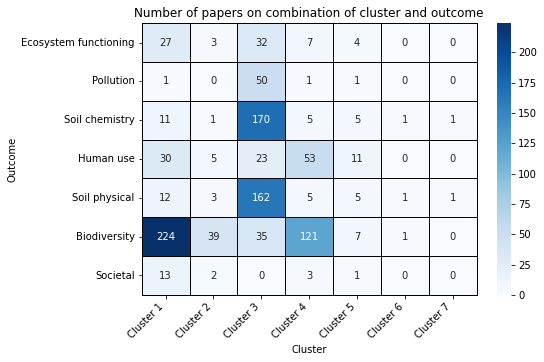

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m,
    cmap='Blues',
    annot=True,
    fmt='.3g',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Cluster')

ax.set_title('Number of papers on combination of cluster and outcome')

plt.savefig(f'tm-results/heatmap_outcome_cluster_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_{k}.png', dpi=150, bbox_inches="tight")

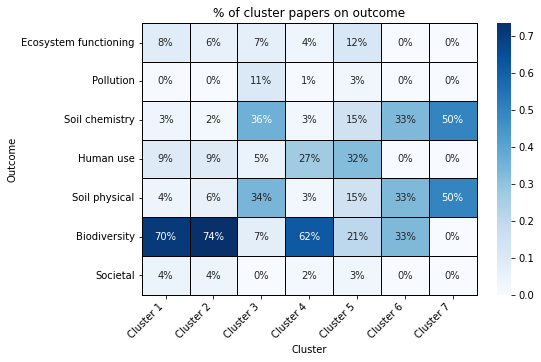

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m/m.sum(),
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Cluster')

ax.set_title('% of cluster papers on outcome')

plt.savefig(f'tm-results/heatmap_outcome_cluster_colsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_colsum_{k}.png', dpi=150, bbox_inches="tight")

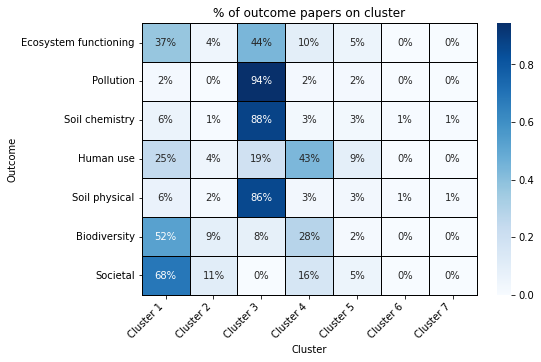

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    (m.T / m.T.sum()).T,
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Cluster')

ax.set_title('% of outcome papers on cluster')

plt.savefig(f'tm-results/heatmap_outcome_cluster_rowsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_rowsum_{k}.png', dpi=150, bbox_inches="tight")

In [13]:
thresh = 0.05
m = np.zeros((n_clusters, W.shape[1]))
for i in range(n_clusters):
    ids = bc[bc['cluster']==i+1]['Lens ID']
    odt = dt[dt['doc'].isin(ids)]
    for j, t in enumerate(topic_names):
        n = odt[(odt['topic']==t) & (odt['value']>thresh)].shape[0]
        m[i,j] = n
        
m = pd.DataFrame(m)
m.index = [f'Cluster {i+1}' for i in range(n_clusters)]
m.columns = topic_names

m

,margin; field margin; field,riparian; buffer; riparian buffer,runoff; filter; filter strip,hedgerow; landscap; speci,soil; water; grass,shelterbelt; wind; shelter,bird; habitat; border,strip; wildflow; speci,boundari; field boundari; field,bobwhit; northern bobwhit; northern
Cluster 1,68.0,14.0,0.0,103.0,11.0,6.0,76.0,79.0,34.0,1.0
Cluster 2,0.0,7.0,2.0,4.0,1.0,7.0,29.0,2.0,0.0,9.0
Cluster 3,1.0,150.0,121.0,10.0,99.0,6.0,4.0,18.0,1.0,0.0
Cluster 4,33.0,1.0,1.0,28.0,4.0,12.0,7.0,75.0,20.0,1.0
Cluster 5,0.0,0.0,0.0,5.0,3.0,14.0,4.0,0.0,0.0,0.0
Cluster 6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Cluster 7,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0


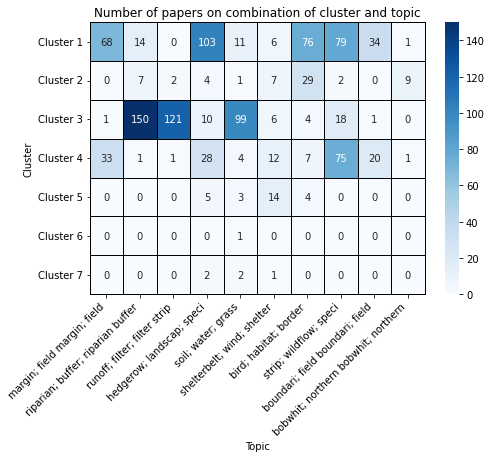

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m,
    cmap='Blues',
    annot=True,
    fmt='.3g',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Cluster')
ax.set_xlabel('Topic')

ax.set_title('Number of papers on combination of cluster and topic')

plt.savefig(f'tm-results/heatmap_outcome_cluster_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_{k}.png', dpi=150, bbox_inches="tight")

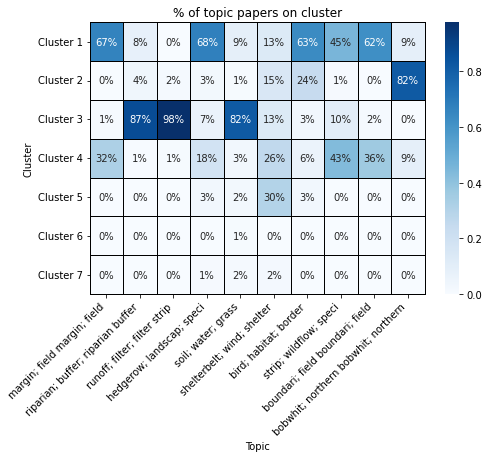

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    m/m.sum(),
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Cluster')
ax.set_xlabel('Topic')

ax.set_title('% of topic papers on cluster')

plt.savefig(f'tm-results/heatmap_outcome_cluster_colsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_colsum_{k}.png', dpi=150, bbox_inches="tight")

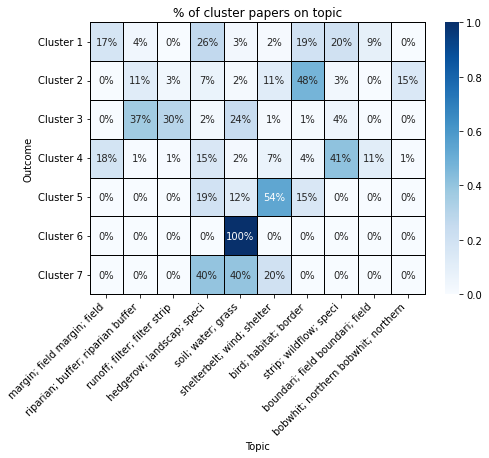

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5,5))

sns.heatmap(
    (m.T / m.T.sum()).T,
    cmap='Blues',
    annot=True,
    fmt='.0%',
    linewidths=0.5, 
    linecolor='black',
    clip_on=False
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_ylabel('Outcome')
ax.set_xlabel('Topic')

ax.set_title('% of cluster papers on topic')

plt.savefig(f'tm-results/heatmap_outcome_cluster_rowsum_{k}.pdf', bbox_inches="tight")
plt.savefig(f'tm-results/heatmap_outcome_cluster_rowsum_{k}.png', dpi=150, bbox_inches="tight")